# SNS風ソフトウェア
学生番号：1958207

氏名：戸塚健人

GUIは作成せず、システムの部分を作成しました。

また、チーム分け機能のみを実装し、イベント機能は実装していません。

データの入力方法は戸塚（e1958207@soka-u.jp）に聞いてください。

※もしかしたら、**Django**を使ってGUIを実装するかもしれません。

→しませんでした


＜注意点＞

本プログラムでは関数を多く作っています。

デバックやプログラムの可読性・拡張性の観点から関数は独立して動作してほしいので、グローバル変数を使うのは避けました。


#メイン関数

＜＜Welcome! OHANA＞＞

＜＜My page＞＞

何をしますか？
1：アカウント作成
2：ログイン→フォロー
3：チーム分け（coloring）
4：チーム分け（SCC）
5：ユーザー検索
6：ユーザー消去
7：終了
Select! :4

同じグループの人がばらけるようにランダムにチーム分けします
何グループに分けますか？（半角英数）
4


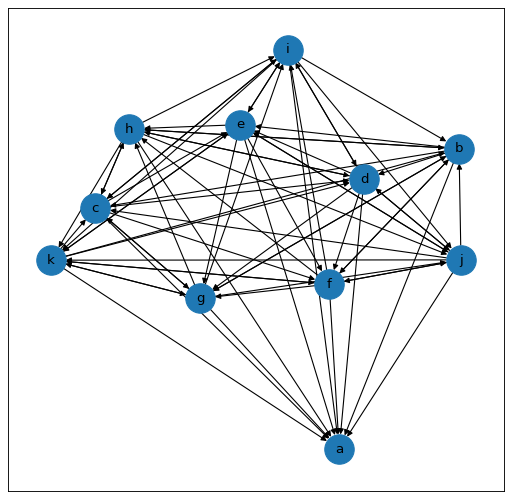


<SCC 1 >
b
h
g
i
c
f
k
j
d
e

<SCC 2 >
a

＜チーム分けの結果＞
a グループ 2
b グループ 2
c グループ 3
d グループ 1
e グループ 0
f グループ 2
g グループ 3
h グループ 1
i グループ 0
j グループ 1
k グループ 0

＜各チームの人数＞
グループ1の人数は 3
グループ0の人数は 3
グループ2の人数は 3
グループ3の人数は 2

何をしますか？
1：アカウント作成
2：ログイン→フォロー
3：チーム分け（coloring）
4：チーム分け（SCC）
5：ユーザー検索
6：ユーザー消去
7：終了
Select! :7
プログラムを終了します


In [ ]:
def main():
  print("＜＜Welcome! OHANA＞＞\n")
  
  #ファイル読み込み
  user_list = []
  user_name_list = []
  user_dict = {}
  file_name = 'user_info_header2.csv' #ファイルの名前を指定
  with open(file_name) as f:
    header = next(csv.reader(f)) #ヘッダーをスキップできる
    data = csv.reader(f)
    for row in data:
      try:
        user = User(row[0], row[1], row[2], row[3]) #アカウント作成

        #フォロー関係の読み込み
        for i in range(len(row)-4):
          if row[i+4] == "": #空データは飛ばす
            pass
          else:
            user.follow_list.append(row[i+4]) #フォローリストに追加

        user_list.append(user) #全ユーザーをリストに格納
        user_name_list.append(user.name)
        user_dict[user.name] = user #名前で検索できるようにする
        
      except IndexError: #データが何も入っていない場合の例外処理
        print("ユーザーはいません")
        sys.exit()

  print("＜＜My page＞＞")
  while True:
    print("\n何をしますか？")
    select = input("1：アカウント作成\n2：ログイン→フォロー\n3：チーム分け（coloring）\n4：チーム分け（SCC）\n5：ユーザー検索\n6：ユーザー消去\n7：終了\nSelect! :")
    if select == "1":
      updated_list, updated_name_list, updated_dict = create_user(user_list, user_name_list, user_dict)
      user_list = updated_list
      user_name_list = updated_name_list
      user_dict = updated_dict
      save(user_list, file_name)
      
    elif select == "2": #特に意味は無し
      name = input("What is your username?\n")
      for i in range(len(user_list)):
        if name == user_list[i].name:
          print("ログイン成功")
          print("ようこそ",name,"さん")
          select = input("フォローを行いますか？\n1:Yes, 2:No\n")
          print("あなたのフォロー一覧：", user_list[i].follow_list)
          if select == "1":
            follow(user_list, user_list[i])
          break
        elif i == len(user_list)-1:
          print("ログイン失敗")
    
    elif select == "3":
      coloring(user_list, user_name_list) #チーム分けに使用する色塗り関数
      save(user_list, file_name) #csvファイルにセーブ

    elif select == "4":
      dsc(user_list, user_dict) #チーム分けに使用する強連結分解関数
      save(user_list, file_name) #セーブ

    elif select == "5":
      name = input("Who do you want to search?\n")
      result = user_search(name, user_list) #ユーザーの検索
      if result != None:
        result.self_introduce()
      else:
        print("メニューに戻ります")

    elif select == "6":
      user_name = input("who do you want to delete?\n")
      #ユーザーの消去
      updated_list, updated_name_list, updated_dict = del_user(user_list,user_name_list, user_dict, user_name)
      #各リストのアップデート
      user_list = updated_list
      user_name_list = updated_name_list
      user_dict = updated_dict
      save(user_list, file_name) #セーブ

    else:
      save(user_list, file_name) #ユーザーの情報をCSVファイルに書き出し
      print("プログラムを終了します")
      break
      #sys.exit() #プログラム終了

if __name__ == "__main__":
	main() 

## ライブラリのインポート

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import collections
import sys
import random

## ユーザーの情報を格納する（Userクラス）
名前、性別、年齢、特技などの情報を格納


In [ ]:
class User:
  def __init__(self, name, gender, age, special):
    self.name = name #名前
    self.gender = gender #性別
    self.age = age #年齢
    self.special = special #特技
    self.group = -1 #所属するグループ

    self.follow_list = [] #自分のフォローリストを作成
    self.rank = None #イベントで使用するランク（今回は関係なし）

  def self_introduce(self):
      print("名前：", self.name)
      print("性別：", self.gender)
      print("年齢：", self.age)
      print("特技：", self.special)
      print("所属するグループ（デフォルトは-1）：", self.group)
      print("現在のランク：", self.rank)

# ユーザー消去関数

In [ ]:
def del_user(user_list, user_name_list, user_dict, user_name):
  if user_name in user_dict: #ユーザーが存在すれば
    user = user_dict[user_name]
    del user_dict[user_name] #指定したユーザーを消去
    user_list.remove(user) #指定したユーザーを消去
    user_name_list.remove(user_name) #指定したユーザーを消去

    for user in user_list:#全てのユーザーに対して
      if user_name in user.follow_list: #消去対象をフォローしていたら
        user.follow_list.remove(user_name) #対象者を消去
    print("消去が完了しました")
  else:
    print("ユーザーが存在しません")
  return user_list,user_name_list, user_dict

# ユーザー検索関数

In [ ]:
def user_search(name, user_list):
    for i in range(len(user_list)): #線形探索
      if name == user_list[i].name:
        return user_list[i]
      elif i == len(user_list)-1: #ユーザーが見つからなかった場合
        print("The target is not available")
        return None

## create_user関数
ユーザーの情報を基にアカウントを作成する


In [ ]:
def create_user(user_list, user_name_list, user_dict):
  roop = True
  while (roop == True):
    name = input("Tell me your name!\n")

    for i in range(len(user_list)): #線形探索
      if name == user_list[i].name: #もし名前が一致したら
        print("This name is already used, please input again :‑(") #同じ名前のユーザーがいないようにする
        break
      
      if i == len(user_list)-1: #最後まで一致しなかったら
        roop = False 
  print("What is your gender?")
  gender = input("1.Male\n2.Female\n3.I prefer not to say\n4.Let me type...\n")
  if gender == "1":
    gender = "Male"
  elif gender == "2":
    gender = "Female"
  elif gender == "3":
    gender = "secret"
  else:
    gender = input("Tell me your gender\n")
  
  age = input("May I ask your age please?\n")
  try:
    age = int(age)
  except ValueError:
    age = input('Please enter a "number"\n')
  
  special = input("What is your specialty?\n")

  user = User(name, gender, age, special)
  user_list.append(user)
  user_name_list.append(user.name)
  user_dict[name] = user
  print("Registration is now Complete. Welcome to OHANA!")

  return user_list, user_name_list, user_dict

## follow関数
フォローを行う関数

In [ ]:
def follow(user_list, me):
  name = input("Who do you follow?\n")
  user = user_search(name, user_list)
  if user != None:
    if (user.name in me.follow_list): #ユーザーを既にフォローしていたら
      print("既にフォローしています")
    else:
      me.follow_list.append(user.name) #ユーザーをフォロー
      print("フォローが完了しました")
      print("フォロー一覧：",me.follow_list)
  else:
    print("フォローに失敗しました")

## save関数（ファイル書き込み）
ユーザーの情報をCSVファイルに書き出す

In [ ]:
def save(user_list, file_name):
  with open(file_name,'w', newline='') as f:
    writer = csv.writer(f)
    if len(user_list) == 0:
      pass
    else:
      header = ["name", "gender", "age", "special"]
      writer.writerow(header)

      for user in user_list: #（データの整合性のため）全ての情報を上書きする
        writer.writerow([user.name, user.gender, user.age, user.special] + user.follow_list) #リストの結合
  #ユーザーが所属するグループはその都度変わるのでセーブしない

  with open('group.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    if len(user_list) == 0:
      pass
    else:
      header = ["name", "group"]
      writer.writerow(header)
      #csvファイルに出力
      for user in user_list:
        writer.writerow([user.name,user.group])

## coloring関数
イベントでチーム分けをする際に「点彩色」を使用する。

点彩色を利用したチーム分けを行う。


In [ ]:
def coloring(user_list,user_name_list):
  G = nx.Graph() #グラフ

  #ユーザーをノードにする
  for i in range(len(user_list)):
    user = user_list[i] #特定のユーザーを取り出す
    G.add_node(user.name) #ユーザーの名前をノードにする
    #まず最初にcsvファイルの順にノードを登録する→カラーリングの描画でずれが出る
  
  for i in range(len(user_list)):
    user = user_list[i]
    #フォロー関係を基にユーザーのつながりを作る
    follow_list = user.follow_list
    for follow in follow_list:
      G.add_edge(user.name, follow) #辺を張る

  #色塗り（有向グラフに使えない）
  colors = nx.coloring.greedy_color(G, strategy='connected_sequential_dfs') #深さ優先順序でカラーリング  
  pos = nx.spring_layout(G)
  nx.draw(G, pos=pos, with_labels=True)
  plt.show()

  #チーム分けの処理
  color_list = [] #何種類の色があるか調べる
  for key in user_list:
    value = colors[key.name]
    color_list.append(value)
  #何種類のチームがあるか調べる
  c_num = collections.Counter(color_list) #リストの各要素の出現個数をカウント

  key_list = c_num.keys() #c_numはCounterオブジェクト
  key_list = list(key_list)
  print("\n",key_list, "の", len(key_list),"色にチーム分けします")

  #もしチーム数が多い場合には、ランダムにチーム分けすることも検討

  #参考のために可視化
  list_colors = [colors[k] for k in sorted(colors.keys(), key=user_name_list.index)] #csvファイルの順に名前（key）をソート
  nx.draw(G, pos=pos, with_labels=True, font_color="RED", node_color=list_colors)
  plt.show()

  print("\n＜チーム分けの結果＞")
  #colorsは辞書型
  for user in user_list:
    user.group = int(colors[user.name]) #グループを登録
    print(user.name,":", "グループ",user.group)

  print("\n＜各チームの人数＞")
  for group in key_list:
    num = list_colors.count(int(group))
    print("グループ"+str(group)+"の人数は", num)

#強連結分解関数
イベントで強連結成分を利用したチーム分けを行う。

In [ ]:
def dsc(user_list, user_dict):
  print("\n同じグループの人がばらけるようにランダムにチーム分けします")
  n = input("何グループに分けますか？（半角英数）\n")
  try:
    n = int(n)
  except:
    print("Error, 3グループに分けます")
    n = 3

  Di_G = nx.DiGraph() #有向グラフ

  #ユーザーをノードにする
  for i in range(len(user_list)):
    user = user_list[i] #特定のユーザーを取り出す
    Di_G.add_node(user.name)

    #フォロー関係を基にユーザーのつながりを作る
    follow_list = user.follow_list
    for follow in follow_list:
      Di_G.add_edge(user.name, follow) #user_name→follwへ有向辺を張る

  #参考のために可視化
  plt.figure(figsize=(8, 8), dpi=80)
  pos = nx.spring_layout(Di_G, k=0.5)
  nx.draw_networkx(Di_G, pos=pos, with_labels=True, node_size=700)
  plt.show()

  #強連結成分分解
  groups = sorted(nx.strongly_connected_components(Di_G), key=lambda x: len(x), reverse=True) #グループの要素数の多い順にソート
  for i in range(len(groups)):
    print("\n<SCC", i+1,">") #強連結成分
    elements = list(groups[i]) #set型をリスト型に変換
    for name in elements:
      print(name)
  
  #チーム分け
  i = 0 #0人のグループができるのを防ぐため
  rec_group = [] #チームの人数を記録
  #random.seed(200) #再現性のため同じseedを使う（同じ乱数の値が出る）
  unique_team = random.sample(range(0, n), k=n) #n個の重複の無い乱数のリスト
  for group in groups:
    for name in group:
      #n個のグループに1人ずつ入れる
      user = user_dict[name] #名前から検索
      user.group = unique_team[i]
      rec_group.append(unique_team[i])
      i += 1
      #iがn人を超えたら乱数を作り直す
      if i >= n:
        i = 0
        #random.seed(200) #再現性
        unique_team = random.sample(range(0, n), k=n) #乱数を作り直す（情報セキュリティにおけるnonce的なイメージ）

  print("\n＜チーム分けの結果＞")
  for user in user_list:
    print(user.name, "グループ", user.group)

  print("\n＜各チームの人数＞")
  for group in unique_team:
    num = rec_group.count(group)
    print("グループ"+str(group)+"の人数は", num)